In [22]:
import pandas as pd

df = pd.read_csv('loan_data_set.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [24]:
df['Dependents'].replace('3+', 3, inplace=True)
df['Loan_Status'].replace('N', 0, inplace=True)
df['Loan_Status'].replace('Y', 1, inplace=True)
df['Gender'].replace('Male', 1, inplace=True)
df['Gender'].replace('Female', 0, inplace=True)
df['Married'].replace('Yes', 1, inplace=True)
df['Married'].replace('No', 0, inplace=True)
df['Education'].replace('Graduate', 1, inplace=True)
df['Education'].replace('Not Graduate', 0, inplace=True)
df['Self_Employed'].replace('Yes', 1, inplace=True)
df['Self_Employed'].replace('No', 0, inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

df = df.drop('Loan_ID',axis=1)

In [25]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

Loan_Status
1    422
0    192
Name: count, dtype: int64
[1, 0]


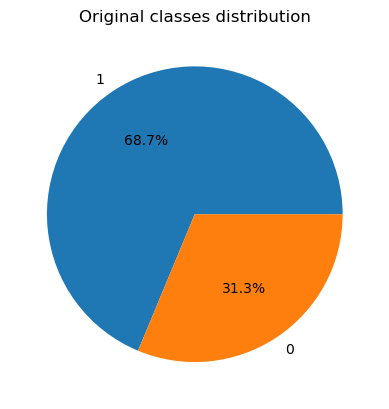

In [26]:
import matplotlib.pyplot as plt

count_values = y.value_counts()
print(count_values)

labels = count_values.index.to_list()
print(labels)

plt.title('Original classes distribution')

plt.pie(x = count_values, labels=labels, autopct='%1.1f%%')

plt.show()

Before resampling:  614
After resampling:  614


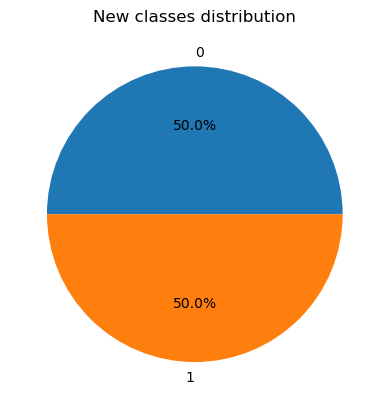

In [27]:
from sklearn.utils import resample

print("Before resampling: ",len(x))
 
df_0 = df[df['Loan_Status'] == 0]

df_1 = df[df['Loan_Status'] == 1]  

count_1=df_1['Loan_Status'].count()

df_0_upsampled = resample(df_0, n_samples= count_1, replace=True)

df = pd.concat([df_0_upsampled,df_1])
 

X = df.drop('Loan_Status',axis=1)
print("After resampling: ",len(x))

y = df['Loan_Status']

count_values=y.value_counts()

labels = count_values.index.to_list()

plt.title('New classes distribution')

plt.pie(x = count_values, labels = labels, autopct = '%1.1f%%' )

plt.show()

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(len(X))
print(len(X_train))
print(len(X_test))

844
675
169


In [29]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('\nAccuracy: {:.2f}\n'.format(100*accuracy_score(y_test, y_pred)))

print('\nPrecision: {:.2f}\n'.format(100*precision_score(y_test, y_pred)))

print('\nRecall: {:.2f}\n'.format(100*recall_score(y_test, y_pred)))

print('\nF1: {:.2f}\n'.format(100*f1_score(y_test, y_pred)))


Accuracy: 83.43


Precision: 94.67


Recall: 74.74


F1: 83.53



<Axes: >

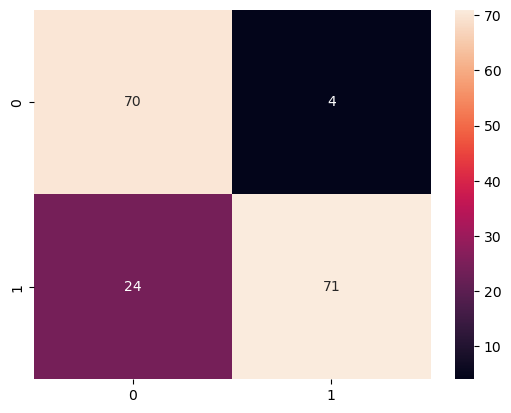

In [31]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)